<a href="https://colab.research.google.com/github/fatimabalig/CODSOFT/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import subprocess
#command to unzip the file
command='unzip "/content/archive.zip"'

#execute the command
subprocess.call(command,shell=True)

0

In [6]:
# Load the datasets
df_test=pd.read_csv('/content/Genre Classification Dataset/test_data.txt',sep=':::',header=0,engine='python')
df_test.columns=['id','title','plot']

df_train=pd.read_csv('/content/Genre Classification Dataset/train_data.txt',sep=":::",header=0,engine='python')
df_train.columns=['id','title','genre','plot']

# Display the first few rows of the datasets to understand their structure
df_train.head()

,id,title,genre,plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [7]:
df_test.head()

,id,title,plot
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


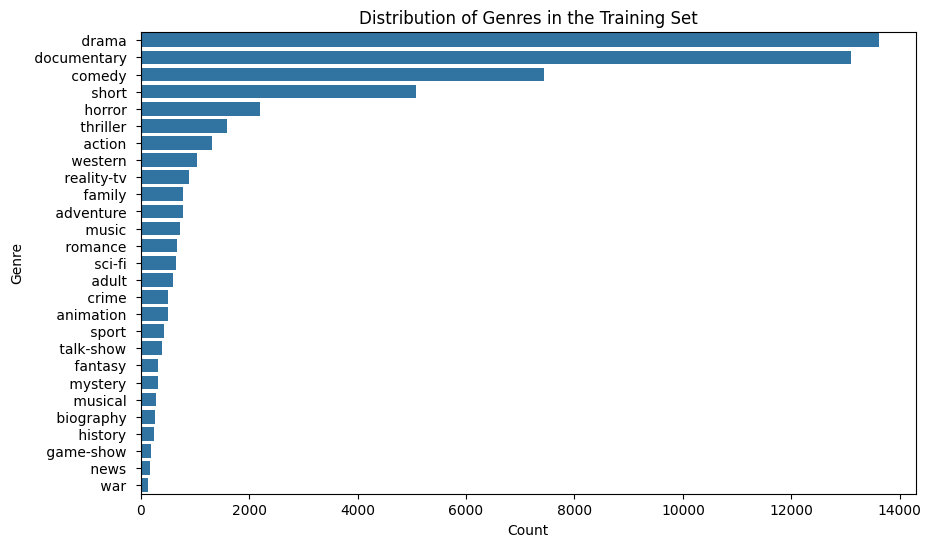

In [8]:
# Visualize the distribution of genres in the training set
plt.figure(figsize=(10, 6))
sns.countplot(y=df_train['genre'], order=df_train['genre'].value_counts().index)
plt.title('Distribution of Genres in the Training Set')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [9]:
# Check for any missing values and drop them
df_train.dropna(subset=['plot','genre'],inplace=True)
df_test.dropna(subset=['plot'],inplace=True)

# Define feature and target variables for training
X_train = df_train['plot']
y_train = df_train['genre']

# Define feature variables for testing
X_test = df_test['plot']


In [10]:
# Create a pipeline that combines the TF-IDF vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear'))
])

In [11]:
# Train the model using the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(solver='liblinear'))])

In [12]:
# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'id': df_test['id'],
    'title': df_test['title'],
    'predicted_genre': y_test_pred
})

# Save the predictions to a CSV file
predictions_df.to_csv('predicted_genres.csv', index=False)

# Display the first few rows of the prediction results
predictions_df.head()


,id,title,predicted_genre
0,2,La guerra de papá (1977),drama
1,3,Off the Beaten Track (2010),documentary
2,4,Meu Amigo Hindu (2015),drama
3,5,Er nu zhai (1955),drama
4,6,Riddle Room (2016),drama


In [13]:
# Perform cross-validation and print the average accuracy
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Evaluate using F1 score
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
print(f'Cross-Validation F1 Scores: {f1_scores}')
print(f'Mean Cross-Validation F1 Score: {f1_scores.mean()}')




Cross-Validation Accuracy Scores: [0.57539426 0.57364198 0.57271973 0.56972883 0.57922892]
Mean Cross-Validation Accuracy: 0.5741427456932006
Cross-Validation F1 Scores: [0.51815137 0.51629122 0.51463335 0.51277756 0.52007371]
Mean Cross-Validation F1 Score: 0.5163854398360106


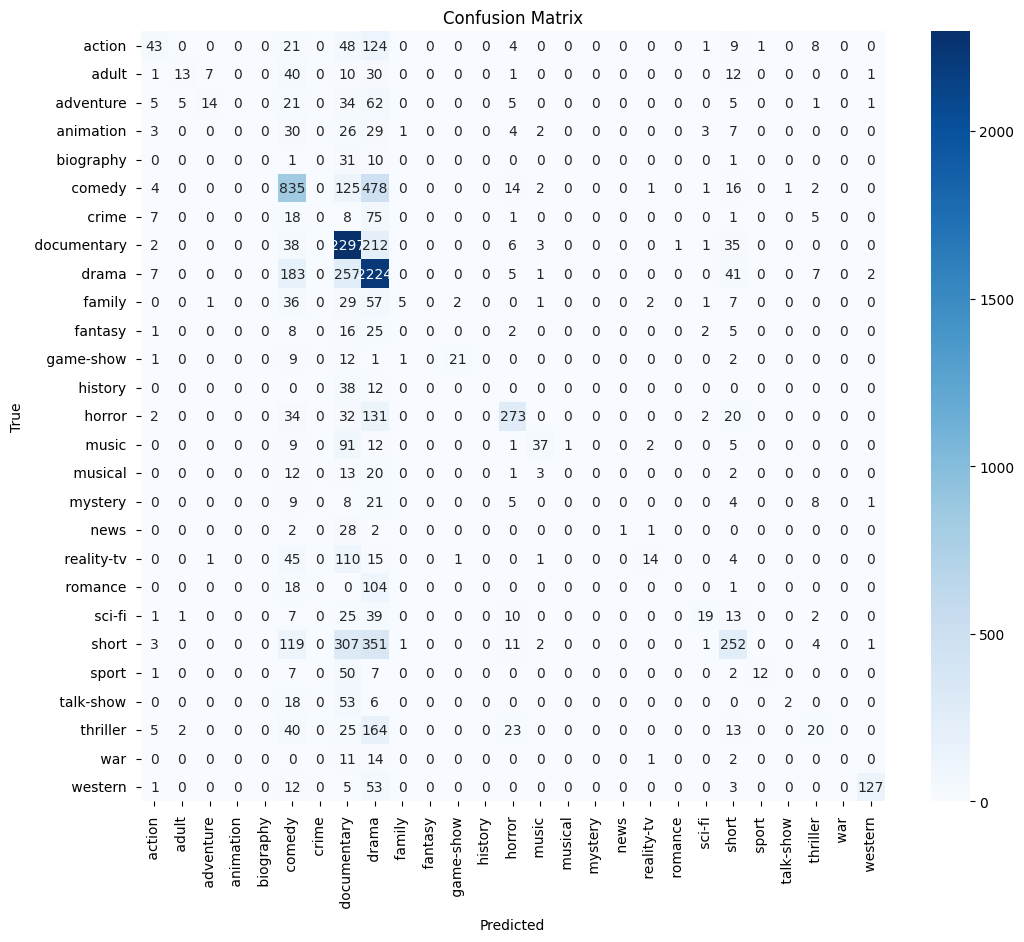

In [14]:
# Split the training data to get predictions for visualization
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the split training set
pipeline.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = pipeline.predict(X_val_split)

# Compute the confusion matrix
cm = confusion_matrix(y_val_split, y_val_pred, labels=pipeline.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# Print classification report
print('Classification Report:')
print(classification_report(y_val_split, y_val_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.49      0.17      0.25       259
       adult        0.62      0.11      0.19       115
   adventure        0.61      0.09      0.16       153
   animation        0.00      0.00      0.00       105
   biography        0.00      0.00      0.00        43
      comedy        0.53      0.56      0.55      1479
       crime        0.00      0.00      0.00       115
 documentary        0.62      0.89      0.73      2595
       drama        0.52      0.82      0.63      2727
      family        0.62      0.04      0.07       141
     fantasy        0.00      0.00      0.00        59
   game-show        0.88      0.45      0.59        47
     history        0.00      0.00      0.00        50
      horror        0.75      0.55      0.63       494
       music        0.71      0.23      0.35       158
     musical        0.00      0.00      0.00        51
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#function to predict the genre of a movie
def predict_genre(plot_summary, model):
    """
    Predict the genre of a movie given its plot summary.

    Parameters:
    plot_summary (str): The plot summary of the movie.
    model (Pipeline): The trained machine learning model.

    Returns:
    str: The predicted genre of the movie.
    """
    prediction = model.predict([plot_summary])
    return prediction[0]

# Example
example_plot = "A young boy discovers he has magical powers and attends a school for wizards."
predicted_genre = predict_genre(example_plot, pipeline)
print(f'The predicted genre for the example plot is: {predicted_genre}')


The predicted genre for the example plot is:  drama 
